# Lista 1 - Regresja logistyczna

## Streszczenie

W niniejszym raporocie zajmiemy się *badaniem i zastosowaniem modelu regresji logistycznej*.<br>
W pierwszej części raportu analizie poddamy dane z pliku *"Lista_1.csv"*. <br>
Ten zbiór danych opisuje relacje między prawdpodobieństwami przyjęcia na studia a wynikami z testów rachunkowych oraz niepewności. <br>
To znaczy mamy trzy zmienne które uwzglęnimy w modelu i poddamy analizie:

- sukces (przyjęcie na studia) - Y $\in\{0,1\}$
- wyniki z testów rachunkowych (numeracy) - $X_1$
- poziom niepewności (anxiety) - $X_2$

W drugiej części wykorzystamy symulacje w celu zbadania wpływu różnych czynników na jakość modelu.<br>


## Wstęp

**Regresja logistyczna** jest modelem statystycznym służącym do przewidywania prawdopodobieństwa zajścia zdarzenia binarnego (np. sukces/porażka, tak/nie).<br>
Jest często stosowana w analizie danych, gdy zmienna zależna ma charakter jakościowy i przyjmuje dwie wartości.<br>

Główne zastosowania regresji logistycznej obejmują:

- Medycynę (np. diagnoza chorób na podstawie wyników badań),
- Ekonomię (np. przewidywanie prawdopodobieństwa bankructwa firmy),
- Psychologię (np. analiza wpływu cech osobowości na decyzje),
- Marketing (np. przewidywanie, czy klient dokona zakupu).

Teoretyczny model jest postaci:
$$
logit(\mu)= X\beta = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n = \log \left( \frac{\mu}{1 - \mu} \right)
$$

gdzie $\mu = p$ - wartość oczekiwana/prawdopodobieństwo sukcesu, a $X_1, X_2, \dots, X_n$ to zmienne objaśniające.

Interpretacja współczynników $\beta_i$ w modelu jest następująca:
- Jeśli $\beta_i > 0$, to wzrost wartości zmiennej $X_i$ zwiększa prawdopodobieństwo sukcesu.
- Jeśli $\beta_i < 0$, to wzrost wartości zmiennej $X_i$ zmniejsza prawdopodobieństwo sukcesu.
- Jeśli $\beta_i = 0$, to zmienna $X_i$ nie ma wpływu na prawdopodobieństwo sukcesu.

Regresja logistyczna pozwala więc na analizę zależności między zmiennymi i ocenę ich wpływu na wynik binarny, co czyni ją potężnym narzędziem w wielu dziedzinach nauki i praktyki.<br>

# Analiza danych

>## Zadania 1, 2, 3

Analizę rozpoczniemy od przyjrzenia się bliżej rozkładowi zmiennych *wynik z testów rachunkowych (numeracy)* oraz *poziom lęku (anxiety)* w podziale na dwie grupy:
"Nieprzyjęci" i "Przyjęci". <br>
W tym celu tworzymy dwa osobne wykresy pudełkowe i umieszczamy je poniżej.<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit, logit
from scipy.stats import norm, cauchy, chi2
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import warnings

In [2]:
dane = pd.read_csv("lista_1.csv")
dane.columns = ["Index","numeracy","anxiety","success"]
dane = dane.set_index("Index")


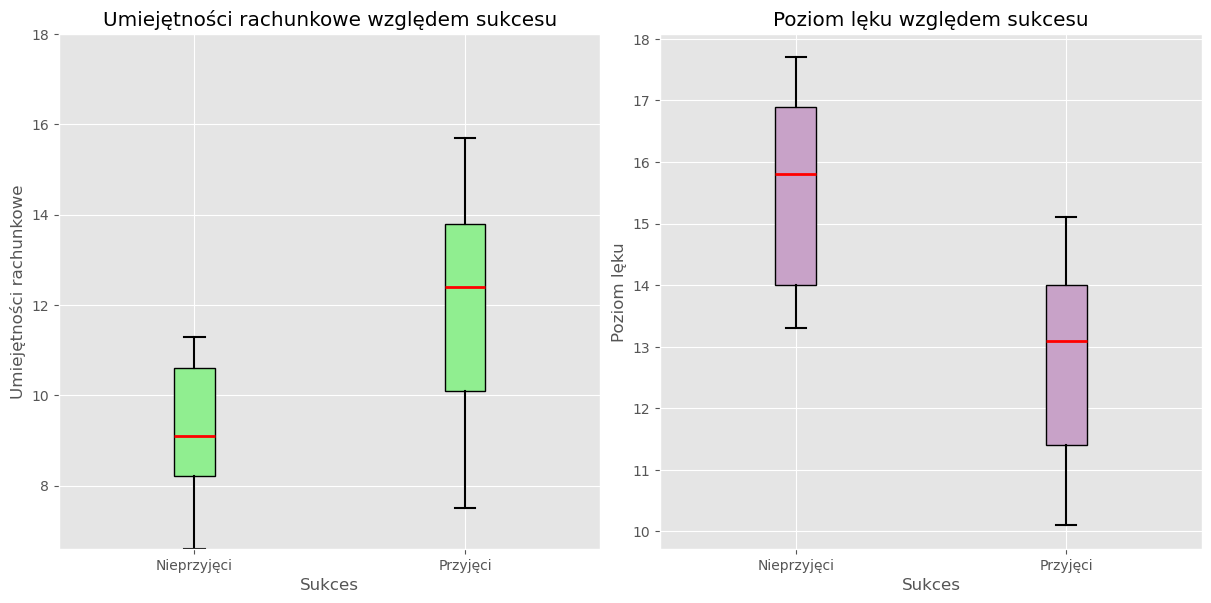

In [3]:

plt.style.use('ggplot')

fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

box_colors = ['lightgreen', "#C8A2C8"]  # Kolory pudełek
median_color = "red"  # Kolor mediany
whisker_color = "black"  # Kolor wąsów


dane.boxplot(column='numeracy', by='success', patch_artist=True,
                   boxprops=dict(facecolor=box_colors[0], color="black"),
                   medianprops=dict(color=median_color, linewidth=2),
                   whiskerprops=dict(color=whisker_color, linewidth=1.5),
                   capprops=dict(color=whisker_color, linewidth=1.5),
                   flierprops=dict(marker='o', color="black", markersize=5),
                   ax=axes[0])

axes[0].set_title("Umiejętności rachunkowe względem sukcesu")
axes[0].set_xticklabels(["Nieprzyjęci", "Przyjęci"])
axes[0].set_xlabel("Sukces")
axes[0].set_ylabel("Umiejętności rachunkowe")
axes[0].set_ylim(min(dane["numeracy"]),18)

# Boxplot anxiety
dane.boxplot(column='anxiety', by='success', patch_artist=True,
                   boxprops=dict(facecolor=box_colors[1], color="black"),
                   medianprops=dict(color=median_color, linewidth=2),
                   whiskerprops=dict(color=whisker_color, linewidth=1.5),
                   capprops=dict(color=whisker_color, linewidth=1.5),
                   flierprops=dict(marker='o', color="black", markersize=5),
                   ax=axes[1])

axes[1].set_title("Poziom lęku względem sukcesu")
axes[1].set_xticklabels(["Nieprzyjęci", "Przyjęci"])
axes[1].set_xlabel("Sukces")
axes[1].set_ylabel("Poziom lęku")
plt.suptitle("")
plt.show()



- **Umiejętności rachunkowe a sukces**

Porównując wyniki w obu grupach obserwujemy, że osoby przyjęte na studia mają wyższe wartości *numeracy* niż osoby nieprzyjęte.<br>
Mediana dla grupy przyjętych (czerwona linia) jest wyraźnie wyższa niż dla nieprzyjętych. <br>
Rozstęp międzykwartylowy (IQR) dla przyjętych jest większy, co sugeruje większe zróżnicowanie umiejętności numerycznych w tej grupie.<br>
Wąsy pokazują, że wartości skrajne są bardziej rozproszone dla grupy przyjętych.<br>

- **Poziom lęku a sukces**

W tym przypadku widzimy, że osoby nieprzyjęte mają wyraźnie wyższy poziom lęku niż osoby przyjęte.<br>
Mediana dla nieprzyjętych znajduje się wyżej niż dla przyjętych, co oznacza, że ich średni poziom lęku jest większy.<br>
Rozstęp międzykwartylowy w grupie nieprzyjętych jest większy, co sugeruje większą zmienność poziomu lęku.<br>

### Wnioski

- Wyższe umiejętności numeryczne zwiększają szanse na sukces (przyjęcie).<br>
Osoby z lepszymi zdolnościami rachunkowymi częściej osiągają pozytywne wyniki, co może wynikać z lepszej analizy problemów i logicznego myślenia.

- Wyższy poziom lęku częściej występuje u nieprzyjętych, co może negatywnie wpływać na wyniki.<br>
Stres i niepewność mogą obniżać skuteczność podejmowania decyzji, co mogło przyczynić się do niższej skuteczności w procesie selekcji.

>## Zadania 4, 5

W kolejnym kroku skupimy się na skonstruowaniu modelu regresji logistycznej. <br>
Warto dodać, że wymieniony we wstępie teoretyczny model korzysta z najbardziej powszechnej funkcji linkującej o nazwie *Logit*. <br>
Mamy jednak pewne alternatywne funkcje, z których możemy skorzystać, są to:

- **Probit($\mu$)** = $\Phi^{-1}(\mu)$
- **Cauchit($\mu$)** = $\tan\left(\pi \left(\mu - \frac{1}{2}\right) \right)$
- **Cloglog($\mu$)** = $\log(-\log(1 - \mu))$

W tym zadaniu będziemy chcieli stworzyć i porównać modele z wykorzystaniem każdej ze wspomnianych funkcji.<br>
Po czym postaramy się wybrać najbardziej odpowiednią.<br>

>### Testy istotności

In [4]:
# konstrukcja modeli 

y = dane["success"]
X = dane[["numeracy","anxiety"]]
X = sm.add_constant(X)

# LOGIT
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# PROBIT
model_probit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.Probit())).fit()

# CAUCHIT
model_cauchit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.Cauchy())).fit()

# CLOGLOG
model_cloglog = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.CLogLog())).fit()

In [5]:
# estymatory: - trzeba podać

# LOGIT
beta = model.params.values

# PROBIT
beta_probit = model_probit.params.values

# CAUCHIT
beta_cauchit = model_cauchit.params.values

# CLOGLOG
beta_cloglog = model_cloglog.params.values


# wyniki testu istotności - trzeba podac

# LOGIT
p_wartosci = model.pvalues.values # wszystkie istotne

# PROBIT
p_wartosci_probit = model_probit.pvalues.values # wszystkie istotne

# CAUCHIT
p_wartosci_cauchit = model_cauchit.pvalues.values # wszystkie istotne

# CLOGLOG
p_wartosci_cloglog = model_cloglog.pvalues.values # wszystkie istotne


In [6]:
# przewidywane prawdopodobieństwo - PODAĆ
X_new = pd.DataFrame({"const": [1], "numeracy": [10], "anxiety": [13]})

# LOGIT
p_pred = model.predict(X_new).values

# PROBIT
p_pred_probit = model_probit.predict(X_new).values

# CAUCHIT
p_pred_cauchit = model_cauchit.predict(X_new).values

# CLOGLOG
p_pred_cloglog = model_cloglog.predict(X_new).values


In [7]:
# Tworzenie tabeli z wynikami
def istotny(p_value):
    return "Tak" if p_value < 0.05 else "Nie"

tabela_wynikow = pd.DataFrame({
    "Model": ["Logit", "Probit", "Cauchit", "Cloglog"],
    "Beta1 Istotny?": [f"{beta[0]:.2f} {istotny(p_wartosci[0])}",
                       f"{beta_probit[0]:.2f} {istotny(p_wartosci_probit[0])}",
                       f"{beta_cauchit[0]:.2f} {istotny(p_wartosci_cauchit[0])}",
                       f"{beta_cloglog[0]:.2f} {istotny(p_wartosci_cloglog[0])}"],
    "Beta2 Istotny?": [f"{beta[1]:.2f} {istotny(p_wartosci[1])}",
                       f"{beta_probit[1]:.2f} {istotny(p_wartosci_probit[1])}",
                       f"{beta_cauchit[1]:.2f} {istotny(p_wartosci_cauchit[1])}",
                       f"{beta_cloglog[1]:.2f} {istotny(p_wartosci_cloglog[1])}"],
    "Beta3 Istotny?": [f"{beta[2]:.2f} {istotny(p_wartosci[2])}",
                       f"{beta_probit[2]:.2f} {istotny(p_wartosci_probit[2])}",
                       f"{beta_cauchit[2]:.2f} {istotny(p_wartosci_cauchit[2])}",
                       f"{beta_cloglog[2]:.2f} {istotny(p_wartosci_cloglog[2])}"]
})
tabela_wynikow[['Beta1', 'beta 1Istotny?']] = tabela_wynikow['Beta1 Istotny?'].str.split(expand=True)
tabela_wynikow[['Beta2', 'beta 2 Istotny?']] = tabela_wynikow['Beta2 Istotny?'].str.split(expand=True)
tabela_wynikow[['Beta3', 'beta 3Istotny?']] = tabela_wynikow['Beta3 Istotny?'].str.split(expand=True)

tabela_wynikow = tabela_wynikow.drop(columns=['Beta1 Istotny?', 'Beta2 Istotny?', 'Beta3 Istotny?'])
tabela_wynikow["Predykcja"] = [f"{p_pred[0]:.3f}", f"{p_pred_probit[0]:.3f}", f"{p_pred_cauchit[0]:.3f}", f"{p_pred_cloglog[0]:.3f}"]


Mając już przygotowane modele przeprowadzimy testy istotności każdego ze współczynników regresji na podstawie p - wartości, dla zadanego poziomu istotności $\alpha = 0.05$.<br>
To znaczy sprawdzimy, w którym modelu jakie zmienne mają wpływ na przyjęcie na studia (sukces) <br>
Następnie za pomocą każdego z nich postaramy się przewidzieć jaką szanse dostania się na studia ma osoba, której poziom lęku wynosi 13 (blisko mediany osób przyjętych)
oraz osiągnęła wynik w teście rachunkowym równy 10 (w wiekszości grupa nieprzyjętych). <br>
Wyniki prezentuje poniższa tabela:

In [8]:
tabela_wynikow.columns = ["Model",r"$\hat{\beta_0}$",r"Istotny?",r"$\hat{\beta_1}$",r"Istotny?",r"$\hat{\beta_2}$",r"Istotny?","Predykcja"]
tabela_wynikow.style.hide(axis="index").set_table_attributes("style='margin:auto; font-size:16px'").set_caption("Testy istotności")


Model,$\hat{\beta_0}$,Istotny?,$\hat{\beta_1}$,Istotny?,$\hat{\beta_2}$,Istotny?,Predykcja
Logit,14.24,Tak,0.58,Tak,-1.38,Tak,0.883
Probit,8.26,Tak,0.34,Tak,-0.80,Tak,0.881
Cauchit,18.38,Nie,0.73,Nie,-1.77,Nie,0.885
Cloglog,9.00,Nie,0.40,Tak,-0.94,Tak,0.896


Obserwujemy, że estymator współczynnika $\beta_1$ jest dodadni w każdym modelu, co sugeruje, że wzrost zmiennej *numeracy* zwiększa prawdopodobieństwo sukcesu.<br>
Natomiast esytmator współczynnika $\beta_2$ we wszyskich modelach jest ujemny, więc świadczy o tym, że wzrost zmiennej *anxiety* zmniejsza prawdopodobieństwo przyjęcia na studia. <br>
Potwierdza to zjawisko zobserwowane wcześniej na boxplotach.<br>

W modelach Logit i Probit wszystkie parametry są istotne, co oznacza, że mają realny wpływ na predykcję sukcesu - te modele są odpowiednie do opsiu danych..<br>
W modelu Cauchit żaden współczynnik nie jest istotny, co sugeruje, że nie opisuje on dobrze danych.<br>
Model Cloglog możemy uznać za pośredni, ponieważ tylko intercept jest nieistotny - jest gorszy od Probit i Logit, ale lepszy od Cauchit.<br>

Prawdopodobieństwo sukcesu w rozważanym przypadku jest na podobnym poziomie, co może sugerować, że mimo różnic w konstrukcji modeli ich moc predykcyjna jest zbliżona.<br>

>### Krzywe ROC

W kolejnym kroku przyjrzymy się krzywym ROC dla każdego ze skonstruowanych modeli.<br>
Krótka definicja oraz stosowne wykresy przedstawione są poniżej.<br>

**Krzywa ROC** pokazuje, jak dobrze model rozróżnia między dwiema klasami (np. sukces vs. brak sukcesu).<br>
Oś X przedstawia proporcję fałszywie pozytywnych wyników (FPR), a oś Y proporcję prawdziwie pozytywnych wyników (TPR).<br>

Interpretacja:

- Im bliżej lewego górnego rogu (czyli im wyższa krzywa), tym lepszy model.
- Pole pod krzywą (AUC) – im bliżej 1, tym lepiej model klasyfikuje przypadki.
- Linia przerywana (kąt 45°) oznacza losowe zgadywanie – model poniżej tej linii jest gorszy niż losowa klasyfikacja.

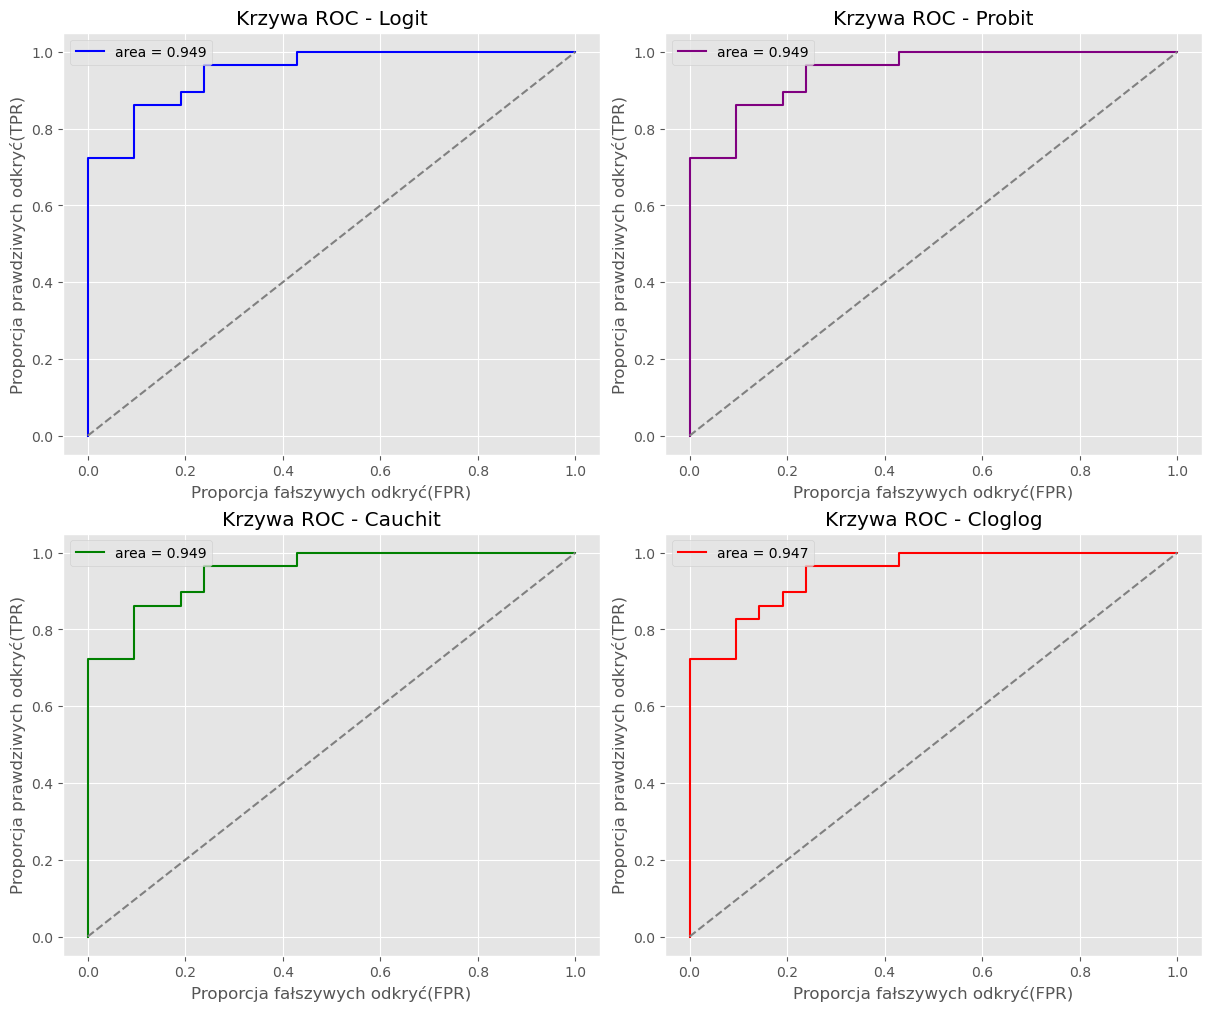

In [9]:
# WYKRESY
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)


# LOGIT
y_true = dane["success"]
y_scores = model.predict(X)  
fpr, tpr, _ = roc_curve(y_true, y_scores)

roc_auc = auc(fpr, tpr)

axes[0,0].plot(fpr, tpr, color='blue', label=f'area = {roc_auc:.3f}')
axes[0,0].set_xlabel('Proporcja fałszywych odkryć(FPR)')
axes[0,0].set_ylabel('Proporcja prawdziwych odkryć(TPR)')
axes[0,0].set_title('Krzywa ROC - Logit')
axes[0,0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0,0].legend()
# PROBIT

y_scores_probit = model_probit.predict(X)

fpr_probit, tpr_probit, _ = roc_curve(y_true, y_scores_probit)

roc_auc_probit = auc(fpr_probit, tpr_probit) # pole

axes[0,1].plot(fpr_probit, tpr_probit, color='purple', label=f'area = {roc_auc_probit:.3f}')
axes[0,1].set_xlabel('Proporcja fałszywych odkryć(FPR)')
axes[0,1].set_ylabel('Proporcja prawdziwych odkryć(TPR)')
axes[0,1].set_title('Krzywa ROC - Probit')
axes[0,1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0,1].legend()


# CAUCHIT

y_scores_cauchit= model_cauchit.predict(X)

fpr_cauchit, tpr_cauchit, _ = roc_curve(y_true, y_scores_cauchit)

roc_auc_cauchit = auc(fpr_cauchit, tpr_cauchit)


axes[1,0].plot(fpr_cauchit, tpr_cauchit, color='green', label=f'area = {roc_auc_cauchit:.3f}')
axes[1,0].set_xlabel('Proporcja fałszywych odkryć(FPR)')
axes[1,0].set_ylabel('Proporcja prawdziwych odkryć(TPR)')
axes[1,0].set_title('Krzywa ROC - Cauchit')
axes[1,0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1,0].legend()

#CLOGLOG

y_scores_cloglog= model_cloglog.predict(X)

fpr_cloglog, tpr_cloglog, _ = roc_curve(y_true, y_scores_cloglog)

roc_auc_cloglog = auc(fpr_cloglog, tpr_cloglog)

axes[1,1].plot(fpr_cloglog, tpr_cloglog, color='red', label=f'area = {roc_auc_cloglog:.3f}')
axes[1,1].set_xlabel('Proporcja fałszywych odkryć(FPR)')
axes[1,1].set_ylabel('Proporcja prawdziwych odkryć(TPR)')
axes[1,1].set_title('Krzywa ROC - Cloglog')
axes[1,1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1,1].legend()

plt.show()


Każdy z modeli osiąga wysoki wynik AUC, co świadczy o dobrej zdolności do odróżniania przypadków pozytywnych od negatywnych.<br>
Model cloglog ma nieco niższą wartość AUC w porównaniu do pozostałych, jednak różnica ta nie ma istotnego wpływu na jego skuteczność klasyfikacji.

### Wniosek

- Modele **logit i probit** zapewniają najlepsze dopasowanie do danych, co widać po istotnych współczynnikach oraz wysokim AUC na krzywych ROC.<br>

>## Zadanie 6

W tym zadaniu rozważamy model regresji logistycznej z funkcją linkującą *logit*.<br>
Na początku wyznaczymy estymator macierzy kowariancji ($\hat{J^{-1}}$) wektora estymatorów parametrów ( $\hat{\beta}$ ).<br>
Następnie przetestujemy hipotezę dotyczącą istotności parametrów.<br>
Na końcu przyjrzymy się jak wartość $\epsilon$ wpływa na algorytm znajdowania estymatorów.<br>

## Porównanie macierzy


Estymatory współczynników $\hat{\beta}$ w dużych próbach mają asymptotyczny rozkład normalny: $\hat{\beta} \approx N(\beta, J^{-1})$, gdzie $J^{-1}$ to asymptotyczna macierz kowariancji estymatorów.<br>


Teoretyczna macierz kowariancji jest dana wzorem: $J^{-1}= \left( X^T S(\beta) X \right)^{-1}$

, gdzie:
- $S(\beta)$ = $\text{diag} ( \sigma_1^2(\beta) \dots \sigma_n^2(\beta))$
- $ \sigma_i^2(\beta) = \mu_i(\beta)(1-\mu_i(\beta))$

Zatem szukany przez nas estymator $\hat{J^{-1}}$ jest postaci $\left( X^T S(\hat{\beta}) X \right)^{-1}$.<br>
Poniżej prezentujemy wartości uzyskane korzystając z tej postaci oraz w tabeli wartości uzyskane za pomocą poleceń Python.<br>

In [10]:
# macierz kowariancji
cov_matrix = model.cov_params()


# odchylenia
std_error = model.bse
variances = std_error**2


\begin{align*}
\hat{J^{-1}} &= 
\begin{pmatrix}
46.23 & -0.25 & -3.06 \\
-0.25 & 0.06 & -0.02 \\
-3.06 & -0.02 & 0.2 
\end{pmatrix}
\end{align*}







In [11]:
# Tabelka z R
tabela_porownanie = pd.DataFrame({
    "Parametry": ["Odchylenia","Wariancje"],
    "Beta_0": [f"{std_error.iloc[0]:.2f}",f"{variances.iloc[0]:.2f}"],
    "Beta_1": [f"{std_error.iloc[1]:.2f}",f"{variances.iloc[1]:.2f}"],
    "Beta_2": [f"{std_error.iloc[2]:.2f}",f"{variances.iloc[2]:.2f}"]
})
tabela_porownanie.columns=["Parametry",r"$\hat{\beta_0}$",r"$\hat{\beta_1}$",r"$\hat{\beta_2}$"]
tabela_porownanie["Parametry"] = [r"$s(\hat{\beta_i})$",r"$s^2(\hat{\beta_i})$"]
tabela_porownanie.style.hide(axis="index").set_table_attributes("style='margin:auto; font-size:16px'").set_caption("Zwracane wartości")

Parametry,$\hat{\beta_0}$,$\hat{\beta_1}$,$\hat{\beta_2}$
$s(\hat{\beta_i})$,6.80,0.25,0.48
$s^2(\hat{\beta_i})$,46.23,0.06,0.23


Widzimy, że nasze wyniki teoretyczne nie różnią się znacząco od tych zwracanych przez Python.<br>

### $\text{Czy w modelu istnieje istotny predyktor?}$

In [12]:

X_null = np.ones(len(y)) # wektor jedynek dlugości y
m0 = sm.GLM(y,X_null, family=sm.families.Binomial()).fit()

D_null = m0.deviance
df_null = len(y) - 1

D_all = model.deviance
df_all = len(y) - len(model.params)

# statystyka testowa
D=(D_null-D_all).item()
D_df=df_null-df_all 

# p-wartość 
p = 1 - chi2.cdf(D,D_df).item()

$$H_0:\ \ \ \beta_1 = \beta_2 = 0\ \ \ vs\ \ \ H_1: (\exists i)\ \ \beta_i \neq 0,\ i\in\{1, 2 \}.$$

$$\text{statystyka testowa}:$$
$$\chi^2 = D(M_0) - D(M_1) = 68.02 - 28.28 = 39.74 $$

$$\text{stopnie swobody}:$$
$$\chi^2(p-1) = 1$$

$$\text{p - wartość}:$$
$$p = 1 - F_{\chi^2}(39.74,1) \approx 0 $$

$$
\text{Wniosek: Odrzucamy } H_0
$$

$
\text{ Odpowiedź: Tak}
$

## Epsilony

**Epsilon** to wartość progowa określająca kryterium stopu w algorytmie iteracyjnym, np. dla metody Newtona-Raphsona w estymacji maksymalnej wiarygodności.<br>
Oznacza minimalną zmianę wartości funkcji celu lub parametrów między kolejnymi iteracjami, przy której uznajemy, że algorytm osiągnął zbieżność.<br>

Domyślna wartość epsilon w algorytmie wynosi $10^{-8}$

In [13]:

data = {
    'epsilon': [r'$10^{-1}$', r'$10^{-2}$', r'$10^{-3}$', r'$10^{-6}$', r'$10^{-8}$'],
    'liczba_iteracji': [3, 4, 5, 6,7],
    'const': ["12.890", "14.093", "14.237", "14.238","14.238"],
    'numeracy': ["0.537", "0.573", "0.577", "0.577","0.577"],
    'anxiety': ["-1.263", "-1.371", "-1.384", "-1.384","-1.384"]
}

df = pd.DataFrame(data)
df.columns=["Epsilon","Liczba iteracji",r"$\hat{\beta_0}$",r"$\hat{\beta_1}$",r"$\hat{\beta_2}$"]
df.style.hide(axis="index").set_table_attributes("style='margin:auto; font-size:16px'").set_caption("Prezentacja wyników")

Epsilon,Liczba iteracji,$\hat{\beta_0}$,$\hat{\beta_1}$,$\hat{\beta_2}$
$10^{-1}$,3,12.890,0.537,-1.263
$10^{-2}$,4,14.093,0.573,-1.371
$10^{-3}$,5,14.237,0.577,-1.384
$10^{-6}$,6,14.238,0.577,-1.384
$10^{-8}$,7,14.238,0.577,-1.384


### Wniosek
Mniejsza wartość epsilon prowadzi do większej liczby iteracji, ale także do stabilniejszych i bardziej precyzyjnych estymatorów.<br>
Dla wartości $10^{-6}$ oraz $10^{-8}$  liczba iteracji jest taka sama, co sugeruje, że dalsze zmniejszanie epsilon nie poprawiłoby wyników.<br>

# Symulacje

W tej części raportu skorzystamy z wysymulowanych danych w celu zbadania w jaki sposób poszczególne czynniki wpływają na jakość stworzonego modelu regresji logistycznej. <br>
Symulacje przeprowadzimy w następujący sposób:

- Wygenerujemy macierz $X$ rozmiaru n = 400, p = 3, której elementy będą zmiennymi losowymi z rozkładu $N(0,\sigma^2 = 1/400) $
- Wektor odpowiedzi $Y$ będzie binarny wygenerowany zgodnie z modelem regresji logistycznej z wektorem $\beta = (3,3,3)$
- Następnie powtórzymy doświadczenie 1000 razy.

Elementy, które będziemy chcieli zbadać to rozkład estymatorów współczynników regresji, macierze kowariancji oraz obciążenie estymatorów.<br>
Przy czym, zbadamy jak elementy te zmieniają się wraz ze zmianą:
- liczby obserwacji (z 400 na 100)
- niezależności regresorów (w sytuacji, gdy są skorelowane)
- liczby regresorów (z 3 na 20)

In [14]:
n = 400
p = 3
np.random.seed(19)
sigma = 1 / np.sqrt(n) 
beta = np.array([3, 3, 3]) 
X = np.random.normal(0, sigma, size=(n, p))

# wektor odpowiedzi
logit = np.dot(X,beta)
prob = expit(logit)
y = np.random.binomial(1,prob)

# model
model_sym = sm.GLM(y, X, family=sm.families.Binomial()).fit()


S = np.diag(prob * (1 - prob)) 
J = np.dot(X.T, np.dot(S, X)) # macierz informacji Fishera
inverse_J = np.round(np.linalg.inv(J),2) # asymptotyczna macierz kowariancji


In [15]:
# powtarzania

def betas(n,p,rep):
    B = np.array([3, 3, 3])
    B_values = np.full((rep, p), np.nan)
    for i in range(rep):
        X = np.random.normal(0, sigma, size=(n, p))
        logit = np.dot(X,beta)
        prob = expit(logit)
        y = np.random.binomial(1,prob)
        model_sym = sm.GLM(y, X, family=sm.families.Binomial()).fit()
        B_values[i, :] = model_sym.params
    return B_values

wyniki = pd.DataFrame(betas(400,3,1000))
wyniki.columns = ["beta1","beta2","beta3"]


## Histogramy rozkładów

>### Oryginalne dane 

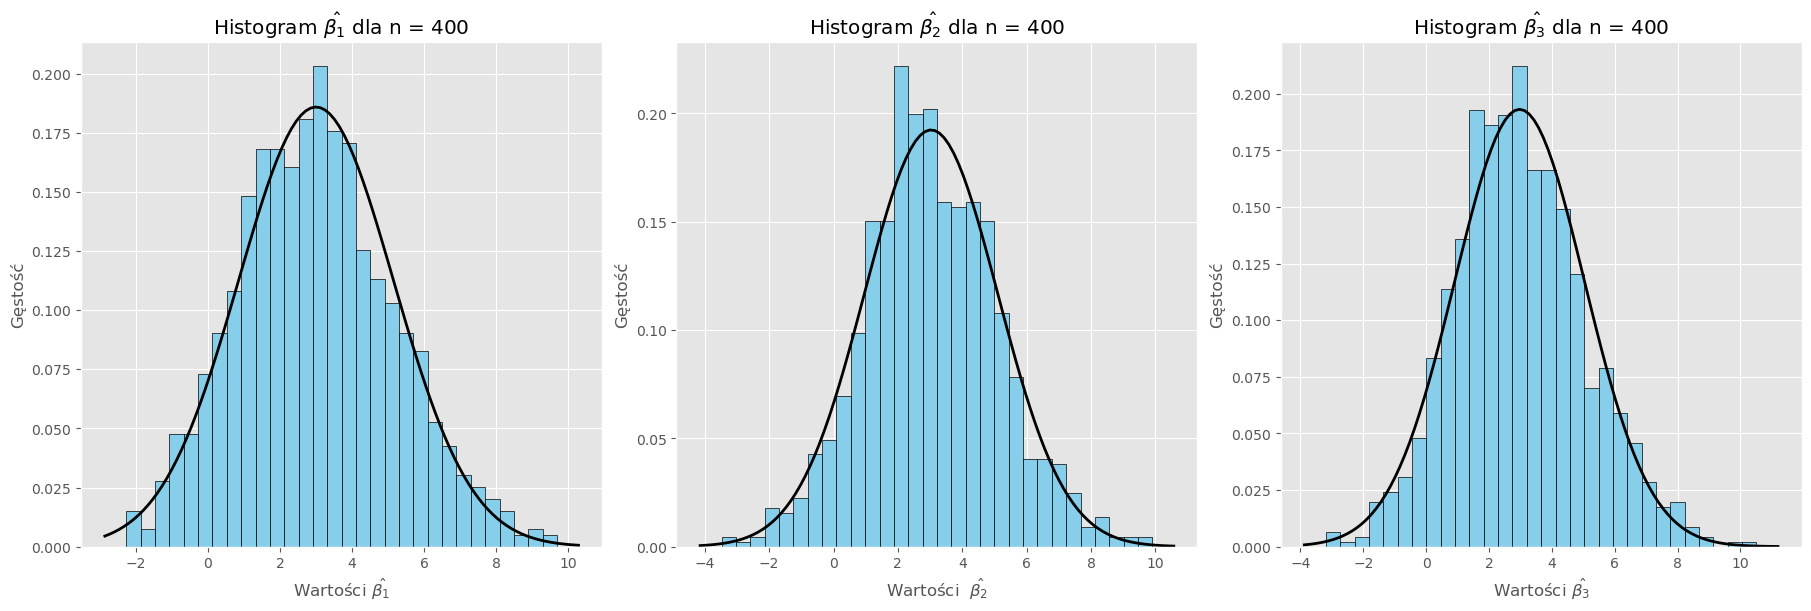

In [16]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), frameon=True, constrained_layout=True)

wyniki["beta1"].hist(bins=30, color="skyblue", edgecolor="black", density=True, ax=axes[0])
mu, std = norm.fit(wyniki["beta1"])
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[0].plot(x, p, 'k', linewidth=2)

axes[0].set_title(r"Histogram $\hat{\beta_1}$ dla n = 400")
axes[0].set_xlabel(r"Wartości $\hat{\beta_1}$")
axes[0].set_ylabel(r"Gęstość")


wyniki["beta2"].hist(bins=30, color="skyblue", edgecolor="black", density=True, ax=axes[1])
mu, std = norm.fit(wyniki["beta2"])
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[1].plot(x, p, 'k', linewidth=2)

axes[1].set_title(r"Histogram $\hat{\beta_2}$ dla n = 400")
axes[1].set_xlabel(r"Wartości  $\hat{\beta_2}$")
axes[1].set_ylabel(r"Gęstość")


wyniki["beta3"].hist(bins=30, color="skyblue", edgecolor="black", density=True, ax=axes[2])
mu, std = norm.fit(wyniki["beta3"])
xmin, xmax = axes[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[2].plot(x, p, 'k', linewidth=2)

axes[2].set_title(r"Histogram $\hat{\beta_3}$ dla n = 400")
axes[2].set_xlabel(r"Wartości $\hat{\beta_3}$")
axes[2].set_ylabel(r"Gęstość")

plt.show()


>### n = 100

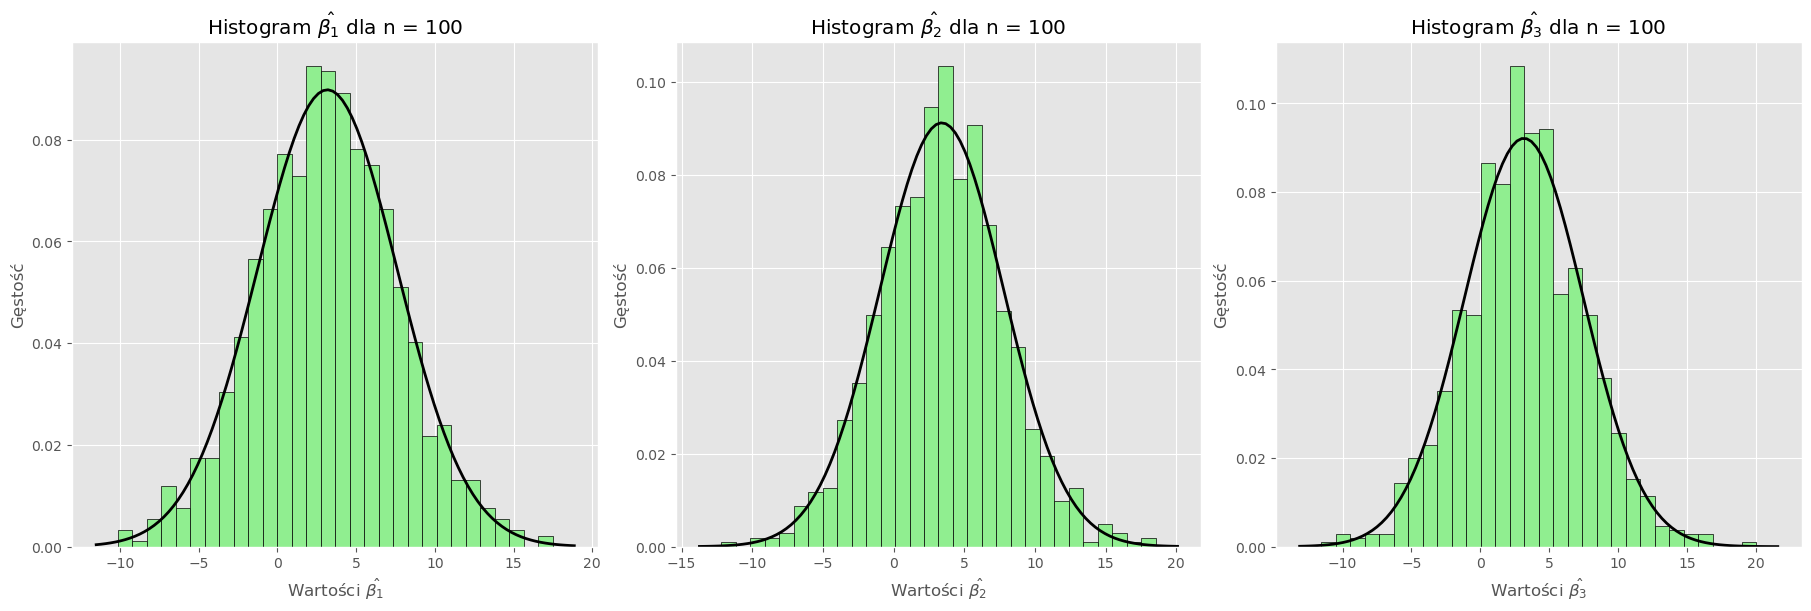

In [17]:
# powtórzyć dla n =100

wyniki1 = pd.DataFrame(betas(100,3,1000))
wyniki1.columns = ["beta1","beta2","beta3"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), frameon=True, constrained_layout=True)

wyniki1["beta1"].hist(bins=30, color="lightgreen", edgecolor="black", density=True, ax=axes[0])
mu, std = norm.fit(wyniki1["beta1"])
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[0].plot(x, p, 'k', linewidth=2)

axes[0].set_title(r"Histogram $\hat{\beta_1}$ dla n = 100")
axes[0].set_xlabel(r"Wartości $\hat{\beta_1}$")
axes[0].set_ylabel(r"Gęstość")


wyniki1["beta2"].hist(bins=30, color="lightgreen", edgecolor="black", density=True, ax=axes[1])
mu, std = norm.fit(wyniki1["beta2"])
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[1].plot(x, p, 'k', linewidth=2)

axes[1].set_title(r"Histogram $\hat{\beta_2}$ dla n = 100")
axes[1].set_xlabel(r"Wartości $\hat{\beta_2}$")
axes[1].set_ylabel(r"Gęstość")


wyniki1["beta3"].hist(bins=30, color="lightgreen", edgecolor="black", density=True, ax=axes[2])
mu, std = norm.fit(wyniki1["beta3"])
xmin, xmax = axes[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[2].plot(x, p, 'k', linewidth=2)

axes[2].set_title(r"Histogram $\hat{\beta_3}$ dla n = 100")
axes[2].set_xlabel(r"Wartości $\hat{\beta_3}$")
axes[2].set_ylabel(r"Gęstość")

plt.show()



>###  Zmienne skorelowane

In [18]:
np.random.seed(19)
from scipy.stats import multivariate_normal
#macier_kowariancji = np.full((3, 3), 0.3) 
macier_kowariancji = (1/400) * (np.full((3, 3), 0.3) + np.diag([0.7] * 3))

X = multivariate_normal.rvs(mean=np.zeros(3), cov=macier_kowariancji, size=400)


beta = np.full(3, 3)

logit = np.dot(X, beta)

prob = expit(logit)

y = np.random.binomial(1, prob, size=400)

model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

S = np.diag(prob * (1 - prob))
J = np.dot(X.T, np.dot(S, X))

inverse_J_2 = np.round(np.linalg.inv(J), 2)


In [19]:
def betas2(n, p, rep):
    B_values = np.full((rep, p), np.nan)
    for i in range(rep):
        X = multivariate_normal.rvs(mean=np.zeros(p), cov=macier_kowariancji, size=n)
        logit = np.dot(X, beta)
        prob = expit(logit)
        y = np.random.binomial(1, prob, size=n)
        model_sym = sm.GLM(y, X, family=sm.families.Binomial()).fit()
        B_values[i, :] = model_sym.params

    return B_values

wyniki3=pd.DataFrame(betas2(400,3,1000))
wyniki3.columns=["beta1","beta2","beta3"]

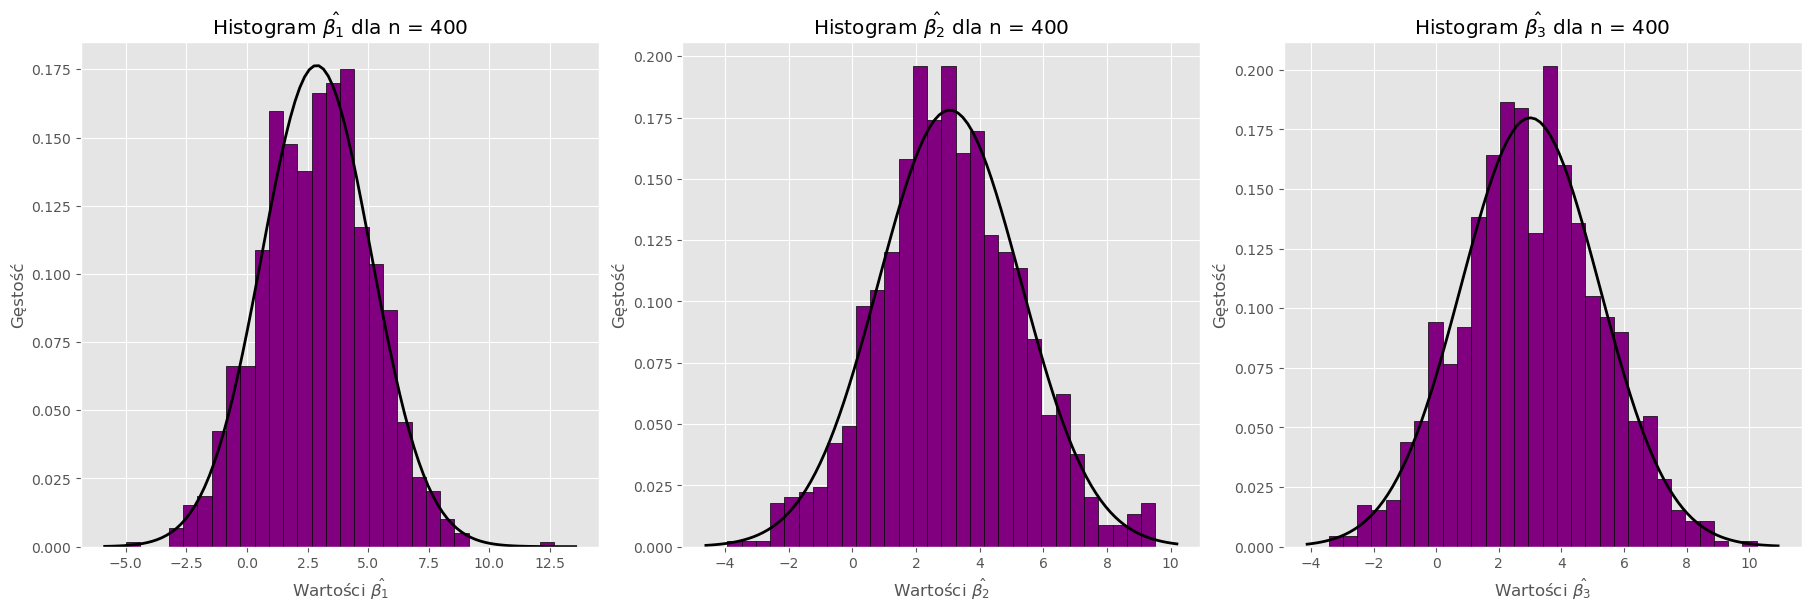

In [20]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), frameon=True, constrained_layout=True)

wyniki3["beta1"].hist(bins=30, color="purple", edgecolor="black", density=True, ax=axes[0])
mu, std = norm.fit(wyniki3["beta1"])
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[0].plot(x, p, 'k', linewidth=2)

axes[0].set_title(r"Histogram $\hat{\beta_1}$ dla n = 400")
axes[0].set_xlabel(r"Wartości $\hat{\beta_1}$")
axes[0].set_ylabel(r"Gęstość")


wyniki3["beta2"].hist(bins=30, color="purple", edgecolor="black", density=True, ax=axes[1])
mu, std = norm.fit(wyniki3["beta2"])
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[1].plot(x, p, 'k', linewidth=2)

axes[1].set_title(r"Histogram $\hat{\beta_2}$ dla n = 400")
axes[1].set_xlabel(r"Wartości $\hat{\beta_2}$")
axes[1].set_ylabel(r"Gęstość")


wyniki3["beta3"].hist(bins=30, color="purple", edgecolor="black", density=True, ax=axes[2])
mu, std = norm.fit(wyniki3["beta3"])
xmin, xmax = axes[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[2].plot(x, p, 'k', linewidth=2)

axes[2].set_title(r"Histogram $\hat{\beta_3}$ dla n = 400")
axes[2].set_xlabel(r"Wartości $\hat{\beta_3}$")
axes[2].set_ylabel(r"Gęstość")

plt.show()


>### 20 regresorów

In [21]:
n = 400
p = 20
np.random.seed(19)
sigma = 1 / np.sqrt(n) 
beta = np.array([3] * 20)
X = np.random.normal(0, sigma, size=(n, p))

# wektor odpowiedzi
logit = np.dot(X,beta)
prob = expit(logit)
y = np.random.binomial(1,prob)

# model
model_sym = sm.GLM(y, X, family=sm.families.Binomial()).fit()


S = np.diag(prob * (1 - prob)) 
J = np.dot(X.T, np.dot(S, X)) # macierz informacji Fishera
inverse_J_4 = np.round(np.linalg.inv(J),2) # asymptotyczna macierz kowariancji

In [22]:
def betas3(n,p,rep):
    B = np.array([3] * 20)
    B_values = np.full((rep, p), np.nan)
    for i in range(rep):
        X = np.random.normal(0, sigma, size=(n, p))
        logit = np.dot(X,beta)
        prob = expit(logit)
        y = np.random.binomial(1,prob)
        model_sym = sm.GLM(y, X, family=sm.families.Binomial()).fit()
        B_values[i, :] = model_sym.params
    return B_values

wyniki4 = pd.DataFrame(betas(400,20,1000))

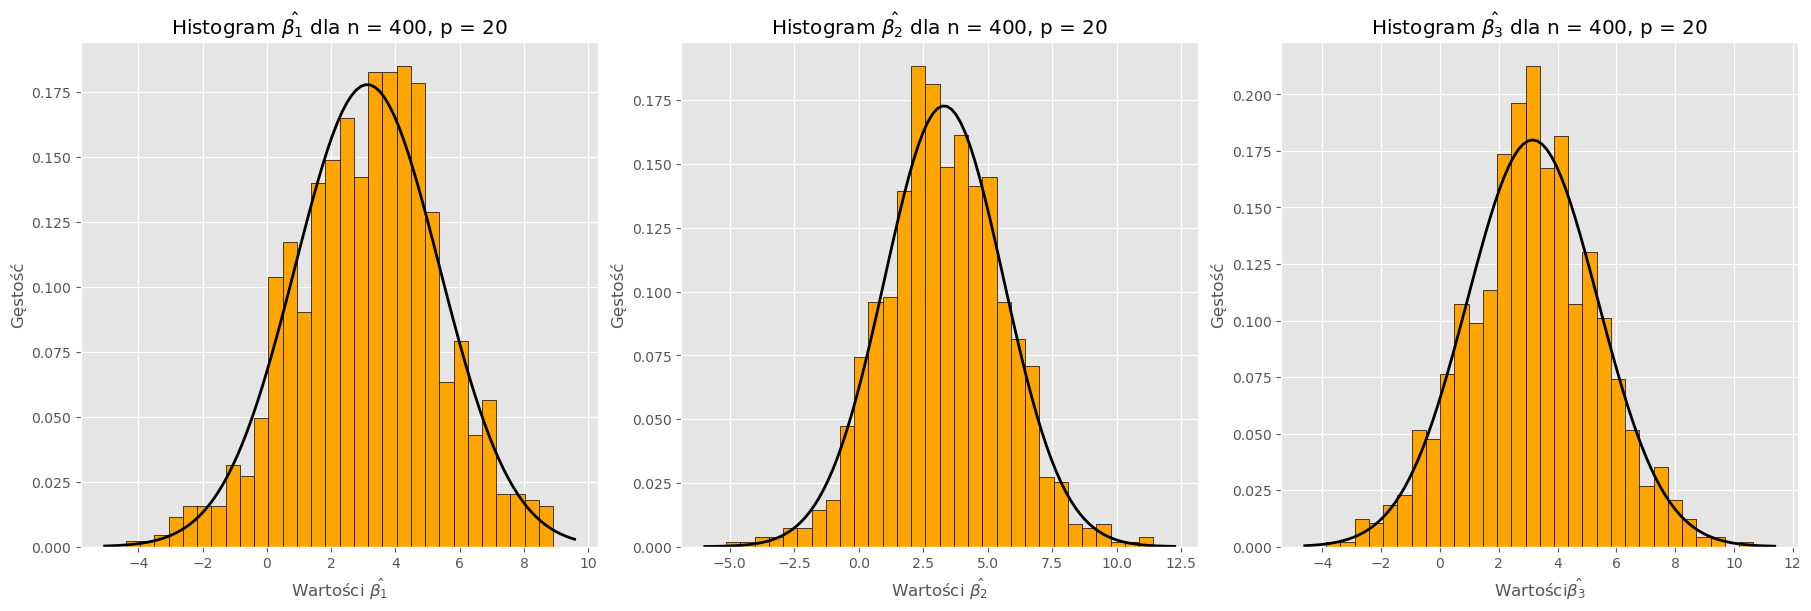

In [23]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), frameon=True, constrained_layout=True)

wyniki4[0].hist(bins=30, color="orange", edgecolor="black", density=True, ax=axes[0])
mu, std = norm.fit(wyniki4[0])
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[0].plot(x, p, 'k', linewidth=2)

axes[0].set_title(r"Histogram $\hat{\beta_1}$ dla n = 400, p = 20")
axes[0].set_xlabel(r"Wartości $\hat{\beta_1}$")
axes[0].set_ylabel(r"Gęstość")


wyniki4[1].hist(bins=30, color="orange", edgecolor="black", density=True, ax=axes[1])
mu, std = norm.fit(wyniki4[1])
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[1].plot(x, p, 'k', linewidth=2)

axes[1].set_title(r"Histogram $\hat{\beta_2}$ dla n = 400, p = 20")
axes[1].set_xlabel(r"Wartości $\hat{\beta_2}$")
axes[1].set_ylabel(r"Gęstość")


wyniki4[2].hist(bins=30, color="orange", edgecolor="black", density=True, ax=axes[2])
mu, std = norm.fit(wyniki4[2])
xmin, xmax = axes[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[2].plot(x, p, 'k', linewidth=2)

axes[2].set_title(r"Histogram $\hat{\beta_3}$ dla n = 400, p = 20")
axes[2].set_xlabel(r"Wartości$\hat{\beta_3}$")
axes[2].set_ylabel(r"Gęstość")

plt.show()


### Omówienie wyników

- **1. Wpływ liczby obserwacji (400 vs. 100)**

Gdy liczba obserwacji wynosi 400, rozkłady estymatorów $\hat{\beta_1}$, $\hat{\beta_2}$, $\hat{\beta_3}$, są bardzo zbliżone do oczekiwanego rozkładu normalnego oraz bardziej skoncentrowane wokół rzeczywistej wartości $\beta = 3$. <br>
Histogramy są węższe, co oznacza mniejszą wariancję estymatorów, czyli większą precyzję.<br>

Po zmniejszeniu liczby obserwacji do 100 rozkłady estymatorów wciąż są bardzo zbliżone do rozkładu normalnego, ale stają się bardziej rozproszone, co wskazuje na zwiększoną wariancję.<br>
Oznacza to, że oszacowania współczynników są mniej stabilne. <br>

- **2. Wpływ skorelowanych regresorów**

Histogramy nadal są zgodne z rozkładem normalnym, ale widać nieco większą wariancję estymatorów, co może wskazywać na wpływ korelacji między regresorami na precyzję oszacowań.<br>

- **3. Wpływ liczby regresorów (3 vs. 20)**

Gdy liczba regresorów wzrasta do 20 histogramy nadal są stosunkowo dobrze dopasowane do krzywej Gaussa, ale wzrasta ich wariancja.

## Macierze kowariancji

Oznaczenia:
- $J_{e}^{-1}$ - oznacza wyestymowaną macierz kowariancji wektora estymatorów ($\hat{\beta_1}$, $\hat{\beta_2}$ i $\hat{\beta_3}$)
- $J_{a}^{-1}$ - oznacza asymptotyczną macierzą kowariancji

>### Oryginalne dane 

In [24]:
# obciążenia
bias = (np.round(wyniki.mean()-3,2)).values
# macierz kowariacnji
cov_matrix = round(wyniki.cov(),2)


\begin{align*}
J_{e}^{-1} &= 
\begin{pmatrix}
4.25 & 0.27  & 0.03 \\
0.27  & 4.38 & -0.02 \\
0.03 & 0.14 & 4.13
\end{pmatrix}
\quad
J_a^{-1} =
\begin{pmatrix}
 4.33 & 0.31 & -0.21  \\
0.31 & 3.91 & -0.02 \\
-0.21  & -0.02 & 4.6 
\end{pmatrix}
\end{align*}


Najbardziej interesujące nas wartości, czyli wariancje estymatorów znajdujące się na przekątnej macierzy są do siebie w dużym stopniu zbliżone. <br>
Widoczne są niewielkie różnice, jednak mogą one wynikać z losowości generowanych danych.<br>

>### n = 100

In [25]:
# obciążenia

bias1 = (np.round(wyniki1.mean()-3,2)).values

# macierz kowariacnji

n1 = 100
beta = np.array([3, 3, 3]) 

np.random.seed(1)
sigma = 1 / np.sqrt(400) 
X1 = np.random.normal(0, sigma, size=(n1, 3))

logit1 = np.dot(X1,beta)
prob1 = expit(logit1)
y1 = np.random.binomial(1,prob1)

# model
model_sym1 = sm.GLM(y1, X1, family=sm.families.Binomial()).fit()


S1 = np.diag(prob1 * (1 - prob1)) 
J1 = np.dot(X1.T, np.dot(S1, X1))
inverse_J1 = np.round(np.linalg.inv(J1),2)

cov_matrix2 = round(wyniki1.cov(),2)


\begin{align*}
J_{e}^{-1} &= 
\begin{pmatrix}
19.75  & 1.51  & -1.43 \\
1.51 & 19.19 & 0.20 \\
-1.43 & 0.20 & 18.77
\end{pmatrix}
\quad
J_a^{-1} =
\begin{pmatrix}
 16.57 & 2.17 & 0.64  \\
2.17 & 19.21 &  1.26 \\
0.64  &  1.26 & 20.01 
\end{pmatrix}
\end{align*}


W przypadku mniejszej liczby obserwacji różnice w wartościach wariancji estymatorów $\hat{\beta_1}$ oraz $\hat{\beta_3}$ są bardziej zauważalne.<br>
Natomiast obserwujemy, że wariancja zwiększyła się istotnie w porównaniu do oryginalnego modelu.<br>

>###  Zmienne skorelowane

In [26]:
# obciążenia
bias3 = (np.round(wyniki3.mean()-3,2)).values

# macierz kowariancji

cov_matrix3 = round(wyniki3.cov(),2)


\begin{align*}
J_{e}^{-1} &= 
\begin{pmatrix}
5.12  & -1.10  & -1.17 \\
-1.10 & 5.03 & -0,93 \\
-1.17 & -0.93 & 4.92
\end{pmatrix}
\quad
J_a^{-1} =
\begin{pmatrix}
 4.89 & -1.46 & -0.24  \\
-1.46 & 5.02 &  -1.45\\
-0.24  &  -1.45 & 4.81
\end{pmatrix}
\end{align*}


W sytuacji, gdy zmienne są skorelowane wartości estymowane i teoretyczne są do siebie bardzo zbliżone.<br>
Widzimy jednak dużo więcej ujemnych wartości .<br>

>### 20 regresorów

W tym przypadku nie jesteśmy w stanie porównać macierzy w całości, więc skupimy się na trzech pierwszych estymatorach jak w poprzednich przykładach.

In [27]:
# obciążenia
bias4 = (np.round(wyniki4.mean()-3,2)).values
# macierz kowariancji
cov_matrix4 = round(wyniki4.cov(),2)


\begin{align*}
J_{e}^{-1} &= 
\begin{pmatrix}
5.54   & 0.28  & 0.04 \\
0.28 & 5.51 & 0.41 \\
0.04 & 0.41 & 5.29
\end{pmatrix}
\quad
J_a^{-1} =
\begin{pmatrix}
 5.03 & 0.41 & 0.21  \\
0.41 & 4.96 &  0.06\\
0.21 &  0.06 & 4.27 
\end{pmatrix}
\end{align*}


Podobnie obserwujemy, że wartości a przekątnej są w dużym stopniu zbliżone.

## Obciążenie estymatorów

In [28]:
obciazenia =pd.DataFrame({
    "Dane": ["Oryginalne","n =100", "n = 400 z korelacja","n = 400, p =20"],
    "Obciazenie beta1": [f"{bias[0]: .2f}",f"{bias1[0]: .2f}",f"{bias3[0]: .2f}",f"{bias4[0]: .2f}"],
    "Obciazenie beta2": [f"{bias[1]: .2f}",f"{bias1[1]: .2f}",f"{bias3[1]: .2f}",f"{bias4[1]: .2f}"],
    "Obciazenie beta3": [f"{bias[2]: .2f}",f"{bias1[2]: .2f}",f"{bias3[2]: .2f}",f"{bias4[2]: .2f}"]
})
obciazenia.columns = ["Dane",r"$\hat{\beta_1}$",r"$\hat{\beta_2}$",r"$\hat{\beta_3}$"]

In [29]:
obciazenia.style.hide(axis="index").set_table_attributes("style='margin:auto; font-size:16px'").set_caption("Porównanie obciążeń")

Dane,$\hat{\beta_1}$,$\hat{\beta_2}$,$\hat{\beta_3}$
Oryginalne,-0.00,0.03,-0.03
n =100,0.17,0.41,0.15
n = 400 z korelacja,-0.13,0.06,0.00
"n = 400, p =20",0.12,0.31,0.15


W oryginalnym modelu obciążenia estymatorów są bardzo małe, co sugeruje, że estymatory są dobrze dopasowane do rzeczywistego wektora $\beta = (3,3,3)$. <br>
Zmniejszenie próby do 100 najbardziej wpłynęło na wzrost obciążenia.<br>
Korelacja między zmiennymi również negatywnie wpłynęła na wyniki, ale w mniejszym stopniu niż zmniejszenie próbki.<br>
Dodanie większej liczby predyktorów zwiększyło obciążenie bardziej niż korelacja, jednak nie tak drastycznie jak zmniejszenie próbki.<br>

## Wnioski

Analiza wpływu różnych czynników na jakość estymatorów w regresji logistycznej pokazuje, że kluczowym aspektem zapewniającym precyzję modelu jest odpowiednia liczba obserwacji.<br>

- Zmniejszenie liczby obserwacji (z 400 do 100) miało najbardziej negatywny wpływ – estymatory miały większą wariancję, większe obciążenie i były mniej stabilne.
- Korelacja między regresorami również pogorszyła wyniki, ale jej wpływ był mniejszy niż zmniejszenie próby. Skorelowane regresory wprowadzały skośność do histogramów i utrudniały estymację.
- Zwiększenie liczby regresorów do 20 zwiększyło wariancję i obciążenie estymatorów, ale nie wpłynęło tak drastycznie na ich jakość jak redukcja próby.

Podsumowując, dla uzyskania stabilnych i precyzyjnych estymatorów kluczowe jest dysponowanie wystarczającą liczbą obserwacji oraz unikanie silnej współliniowości między zmiennymi.<br> Dodawanie większej liczby predyktorów ma umiarkowany wpływ na jakość modelu, o ile liczba obserwacji jest odpowiednio duża.

In [31]:
# Jak generować bez kodu i bez ostrzeżeń
!jupyter nbconvert --to html --no-input --log-level=ERROR Lista1-ZML.ipynb